#### <hr>
<center>
    <img src="IMAGES/FCUC-logo.png" width="400" height="400">
</center>
<hr>
<h1>DATA SCIENCE ASSIGNMENT 2023</h1>
<ul>
    <li><b>Module:</b> CISY3020 Data Science (MS. NURUL AKMAR AZMAN)
    <li><b>Author:</b>B1378 LAI KAR MUN, B1499 JEREMY PUN KHENG MING, B1663 LAY SIANG CHIN 
    <li><b>Date:</b>10-12-2023
</ul>
<b>Tools:</b>
<ul>
    <li>Numpy
    <li>Pandas
    <li>matplotlib
    <li>seaborn
    <li>sklearn
    <li>joblib
</ul>
Note: To use this notebook, kindly install either one of the following dataset sources:

[INDIA AQI.csv file](DATA/city_day.csv) | 
[INDIA AQI KAGGLE](https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india)

<hr>
<center><h1>Table of Contents</h1></center>
<hr>
Chapter 1: Business Understanding
<br>Chapter 2: Data Understanding
<br>Chapter 3: Data Preparation
<br>Chapter 4: Machine Learning Modelling
<br>Chapter 5: Evaluation

<hr>
<center><h1>Styling</h1></center>
<hr>

In [149]:
%%html
<style>
    hr.dotted-hr { #style hr to be dotted line
      border: none;
      border-top: 2px dotted #f00; /* Increase the border width for a more obvious dotted line */
      color: #fff;
      background-color: #fff;
      height: 2px; /* Adjust the height to match the border-top width */
    }
    
    h1 {color:#000080;  /* NavyBlue in colour*/}
    
    h2 {color:#0000FF;  /*Blue in colour*/}
</style>

<hr>
<center><h1>Chapter 1: Business Understanding</h1></center>
<hr>

<h2>Introduction to India</h2>
<ol>
<li>India has a diverse climate influenced by its geographical features, including the Himalayan mountain range in the north, the Thar Desert in the northwest, and the coastal areas along the Arabian Sea and the Bay of Bengal. The country experiences a variety of climatic conditions, ranging from tropical in the south to alpine in the Himalayan regions.</li> <li>The major climate zones in India such as Tropical Climate, Subtropical Climate, Desert Climate, Mountainous Climate, Monsoon Season, Cyclones and Winter Season.
India's climate variability contributes to a diverse range of ecosystems, agricultural patterns, and cultural practices.</li> 
    <li>The country's weather is influenced by both tropical and extratropical factors, making it important for various sectors, including agriculture, water management, and disaster preparedness, to adapt to the changing climatic conditions.</li>
</ol>
<h2>Goals</h2>
<ol>
<li>To preprocess existing India AQI dataset to meet the requirements of machine learning.</li> 
</ol>
<h2>Objectives</h2>
<ol>
<li>To speed up the existing Air Quality Index (AQI) analytics procedure with machine learning.</li> 
<li>To propose a machine learning model that can automate the process of determining the classes of AQI. </li> 
</ol>

<hr>
<center><h1>Chapter 2: Data Understanding</h1></center>
<hr>

2.1. Overview of data
<br>2.2. Initial summary of data
<br>2.3. Dateset datatype
<br>2.4. Summary statistics
<br>2.5. Idenitifying null values
<br>2.6. Understanding null values
<br>2.7. Identifying the unique values of each feature
<br>2.8. Identifying the frequnecy of each feature value
<br>2.9. Feature studies
<br>2.10. Correlation
<hr>

<h2>Global imports</h2>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the Okabe-Ito color palette
okabe_ito_palette = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

<img src="IMAGES/color_palette.png" width="500" height="400">


Note: To use this notebook, kindly update the dataset path below according to the location of the .csv file

In [308]:
data=pd.read_csv(r"C:\Users\JEREMY\OneDrive - FIRST CITY UNIVERSITY COLLEGE\FCUC-DEGREE(2022)\SEM 6 (11-09-2023)\CISY3020 Data Science (MS. NURUL AKMAR AZMAN)\ASSIGNMENT\DATA\city_day.csv")

<h2>2.1. Overview of data</h2>
<ol>
<li>Air is what keeps humans alive. Monitoring it and understanding its quality is of immense importance to our well-being.</li>
<li>India's annual average PM2.5 levels reached 58.1 µg/m³ in 2021, ending a three-year trend of improving air quality.</li> 
<li>India's annual PM2.5 averages have now returned to pre-quarantine concentrations measured in 2019.India was home to 11 of the 15 most polluted cities in Central and South Asia in 2021.</li> 
</ol>

<center>
    <img src="IMAGES/india_gate_wallpaper_round.png" width="800" height="1000">
</center>

In [152]:
print(data)

                City       Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad   1/1/2015    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad   2/1/2015    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad   3/1/2015    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad   4/1/2015    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad   5/1/2015    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...        ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  27/6/2020  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  28/6/2020  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  29/6/2020  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  30/6/2020  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam   1/7/2020  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  

<h2>2.2. Initial summary of data</h2>
<br>
The initial summary of the dataset is as follows,

In [153]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2/1/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,3/1/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,4/1/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,5/1/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [154]:
data.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,27/6/2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28/6/2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29/6/2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30/6/2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,1/7/2020,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


<h2>2.3. Dataset datatype</h2>
<br>
The datatype of the dataset is as follows,

In [155]:
#preview data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


<b>Concept:</b> 
<ol>
<li><b>Data Integrity and Quality:</b></li>
    <ul>
        <li>Helps ensure that the data is stored correctly. </li>
        <li>Incorrect data types can lead to errors in calculations and analyses.</li>
        <li>Allows for the identification of missing or inconsistent values, which is essential for data cleaning and preprocessing.</li>
    </ul>
    <br>
<li><b>Feature Engineering:</b></li>
    <ul>
<li>Aids in feature engineering, where data needs to be convert or create new features based on existing ones. </li></ul>
</ol>
<b>Observation:</b> 
<ol>
    <li>Only <b>City</b> and <b>Date</b> data is complete. </li>
    <li>Date column needs to separate into day, month, and year when preprocessing.</li>
</ol>

<h2>2.4. Summary statistics</h2>
<br>
The initial summary of the dataset is as follows,

In [156]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


<b>Concept:</b> 
<ol>
<li><b>Data Completeness: </b></li>
The 'Count' information helps identify missing data, ensuring that you have a complete dataset for analysis.
<li><b>Central Tendency:</b></li>
Mean and median provide insights into the central value, which helps you understand the typical value or central trend in the data.
<li><b>Data Variability:</b></li>
Standard deviation and quartiles (25th and 75th percentiles) provide information about the data's variability, allowing you to assess how data points are spread around the central value.
<li><b>Outlier Detection:</b></li>
Minimum and maximum values can help you identify potential outliers or extreme data points that may need further investigation.
<li><b>Data Distribution:</b></li>
Percentiles (quartiles) and the median provide a sense of the data's distribution and how it is spread across different percentiles.
</ul>

<h2>2.5. Identifying null values</h2>
<br>
The missing values from the dataset is as follows,

In [157]:
#check missing value 
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

<b>Observation:</b> 
<ol>
    <li>Observation 1 from 2.3. Dataset Datatype is true as <b>City</b> and <b>Date</b> data is complete. </li>
</ol>

Note: The below is a feature declaration for all features in the dataset

In [158]:
# FEATURE DECLARATION

# OBJECT
City = 'City'
Date = 'Date'

# float64
PM2 = 'PM2.5'
PM10 = 'PM10'
NO = 'NO'
NO2 = 'NO2'
NOx = 'NOx'
NH3 = 'NH3'
CO = 'CO'
SO2 = 'SO2'
O3 = 'O3'
Benzene = 'Benzene'
Toluene = 'Toluene'
Xylene = 'Xylene'
AQI = 'AQI'

# OBJECT
AQI_Bucket = 'AQI_Bucket'

<h2>2.6. Understanding the null values</h2>
<br>
The percentange for each missing values from the dataset is as follows,

In [159]:
def checkNullValues(data,column_name):
    print(f"\n\033[1m• Percent of missing '{column_name}'records = \033[0m%.2f%%" %((data[column_name].isnull().sum() / data.shape[0]) * 100))

checkNullValues(data, City)    
checkNullValues(data, PM2)
checkNullValues(data, PM10)
checkNullValues(data, NO)
checkNullValues(data, NO2)
checkNullValues(data, NOx)
checkNullValues(data, NH3)
checkNullValues(data, CO)
checkNullValues(data, SO2)
checkNullValues(data, O3)
checkNullValues(data, Benzene)
checkNullValues(data, Toluene)
checkNullValues(data, Xylene)
checkNullValues(data, AQI)
checkNullValues(data, AQI_Bucket)


• Percent of missing 'City'records = 0.00%

• Percent of missing 'PM2.5'records = 15.57%

• Percent of missing 'PM10'records = 37.72%

• Percent of missing 'NO'records = 12.13%

• Percent of missing 'NO2'records = 12.14%

• Percent of missing 'NOx'records = 14.17%

• Percent of missing 'NH3'records = 34.97%

• Percent of missing 'CO'records = 6.97%

• Percent of missing 'SO2'records = 13.05%

• Percent of missing 'O3'records = 13.62%

• Percent of missing 'Benzene'records = 19.04%

• Percent of missing 'Toluene'records = 27.23%

• Percent of missing 'Xylene'records = 61.32%

• Percent of missing 'AQI'records = 15.85%

• Percent of missing 'AQI_Bucket'records = 15.85%


<b>Concept:</b> 
<ol>
    <li>Features that have a missing percentange of ≥ 40%, could be discarded.</li>
</ol>
<b>Action:</b> 
<ol>
    <li><b>Xylene</b> will be discarded.</li>
</ol>

Note: The below is the code to drop Xylene

In [160]:
data = data.drop(Xylene, axis=1)

In [161]:
data.head(2)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,NaN,NaN
1,Ahmedabad,2/1/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,NaN,NaN


<h2>2.7. Identifying the unique values of each feature</h2>
<br>
The unique values of each feature is as follows,

In [162]:
# Loop through all columns and print unique values
for column in data.columns:
    unique_values = data[column].unique()
    unique_values.sort
    print(f'\n\033[1m• Unique values in {column}:\033[0m\n\n{unique_values}')


• Unique values in City:

['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']

• Unique values in Date:

['1/1/2015' '2/1/2015' '3/1/2015' ... '29/6/2020' '30/6/2020' '1/7/2020']

• Unique values in PM2.5:

[  nan 73.24 83.13 ... 33.17 25.4  24.38]

• Unique values in PM10:

[   nan 141.54 122.41 ...  58.54  32.27  66.  ]

• Unique values in NO:

[ 0.92  0.97 17.4  ... 29.35 30.16 18.55]

• Unique values in NO2:

[18.22 15.69 19.3  ... 58.99 52.1  53.59]

• Unique values in NOx:

[17.15 16.46 29.7  ... 42.33 45.87  7.07]

• Unique values in NH3:

[  nan 26.64 25.63 ...  4.1  28.34 42.86]

• Unique values in CO:

[ 0.92  0.97 17.4  ...  4.85  5.59  4.56]

• Unique values in SO2:

[27.64 24.55 29.07 ... 26.63 31.16 21.67]

• Unique values in 

<h2>2.8. Get the frequency of the unique value of each feature</h2>
<br>
The frequency of each unique values frome each feature is as follows,

In [163]:
# Loop through all columns and print unique values
for column in data.columns:
#     unique_values = data[column].unique().sort
    unique_values = data[column].value_counts()
    print(f'\n\033[1m• Unique values in {column}:\033[0m\n\n{unique_values}')


• Unique values in City:

Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: City, dtype: int64

• Unique values in Date:

1/7/2020     26
8/4/2020     26
10/4/2020    26
11/4/2020    26
12/4/2020    26
             ..
10/4/2015     7
4/1/2015      7
3/1/2015      6
2/1/2015      6
1/1/2015      6
Name: Date, Length: 2009, dtype: int64

• U

<b>Observation:</b> 
<ol>
    <li>City names in <b>City</b> is not uniform. </li>
    <li>Date in <b>Date</b> is not uniform. </li>
</ol>

<h2>2.9. Feature Studies</h2>
<br>
Based on the data given, the air pollution particles can be divided by pm 2.5 and pm10,
<br><br>
<center>
    <img src="IMAGES/PM_SIZE_FILLED.png" width="600" height="400">
</center>
<br>
<h3>PM2.5 (Particulate Matter with a diameter of 2.5 micrometers or smaller): </h3>
<ul>
    <li>NO</li>
    <li>NO2</li>
    <li>NOx</li>
    <li>NH3</li>
    <li>Benzene</li>
    <li>Toluene</li>
    <li>Xylene</li>
</ul>
<h3>PM10 (Particulate Matter with a diameter of 10 micrometers or smaller): </h3>
<ul>
    <li>CO</li>
    <li>SO2</li>
    <li>O3</li>
</ul>

<h3>a. PM2.5</h3>
<ul>
<li>
    <b>Health concerns: </b><br>
Fine particles can penetrate deep into the lungs and enter the bloodstream, potentially causing asthma, bronchitis,    and heart attacks.
</li>

<li><b>Pollution source:</b><br>
Sources include vehicle emissions, industrial processes, construction activities, agriculture (dust from plowing and field burning), and natural sources (wildfires, dust storms). 
</li>
</ul>

In [309]:
print("Average: ", data['PM2.5'].mean())

Average:  67.45057794890272


<h3>b. PM10</h3>
<ul>
<li>
<b>Health concerns: </b><br>
PM10 can also have respiratory health effects, but because these particles are larger than PM2.5, they are generally deposited in the upper respiratory tract.

</li>

<li><b>Pollution source:</b><br>
Sources include vehicle emissions, industrial processes, construction activities, agriculture (dust from plowing and field burning), and natural sources (wildfires, dust storms). 
</li>
</ul>

In [166]:
print("Average: ", data['PM10'].mean())

Average:  118.12710293078102


<h3>c. NOx, NO2, NH3</h3>
<ul>
<li>
<b>Health concerns: </b><br>NO and NO2 are key components of nitrogen oxides (NOx). Short-term exposure to high levels of NO2 can irritate the respiratory system and contribute to respiratory problems. NOx exposure is linked to respiratory diseases, and NO2 specifically is associated with asthma exacerbation.
</li>

<li><b>Pollution source: </b><br>Sources include combustion processes in vehicles and industrial facilities. Traffic-related emissions are a major source of NO and NO2. 
</li>
</ul>

In [167]:
print("Average: ", data['NOx'].mean())
print("Average: ", data['NO2'].mean())
print("Average: ", data['NH3'].mean())

Average:  32.309123333070055
Average:  28.560659061126763
Average:  23.483476019371977


<h3>d. CO</h3>
<ul>
<li>
<b>Health concerns: </b><br>Breathing in high levels of carbon monoxide can lead to respiratory problems. CO binds to hemoglobin in red blood cells, reducing the amount of oxygen that can be transported to body tissues.
</li>

<li><b>Pollution source: </b><br>Combustion engines in vehicles produce carbon monoxide as a byproduct of incomplete combustion. Traffic congestion and poorly ventilated tunnels can lead to elevated CO levels.
</li>
</ul>

Average:  2.248598209085598


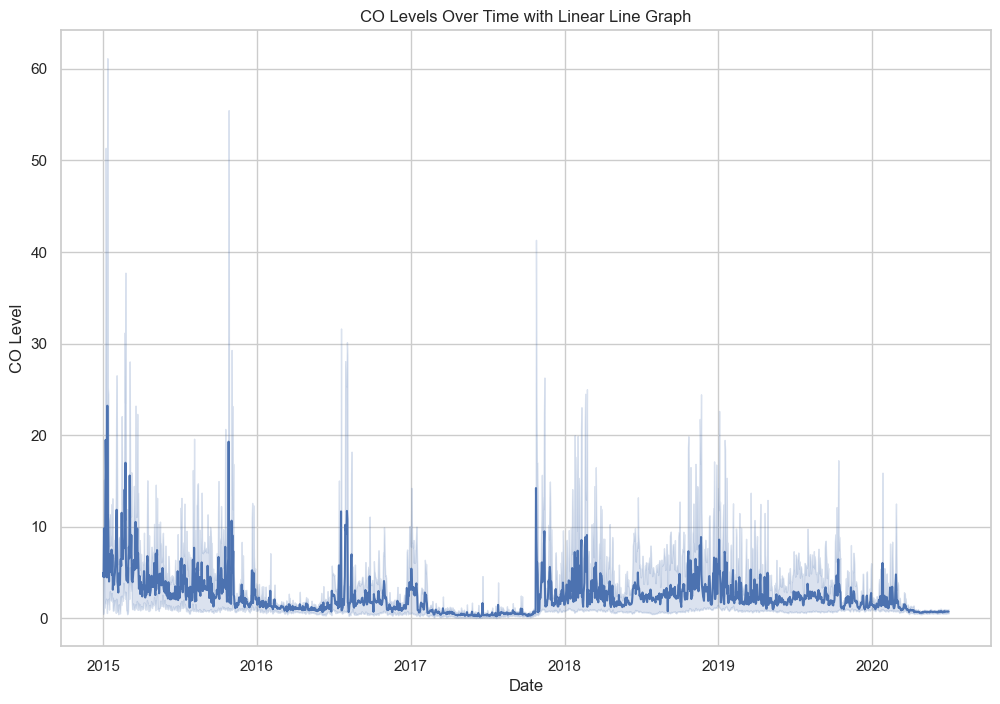

In [168]:
# Calculate the average of the 'CO' column
print("Average: ", data['CO'].mean())

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Make sure to import pandas

# Assuming you have a 'Date' column and a 'CO' column in your dataset
date_column = 'Date'
co_column = 'CO'

# Convert the 'Date' column to datetime with the specified format
data[date_column] = pd.to_datetime(data[date_column], format='%d/%m/%Y')

# Sort the DataFrame by the 'Date' column (if it's not sorted already)
data = data.sort_values(by=date_column)

# Plotting with a linear line graph
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.lineplot(x=date_column, y=co_column, data=data)
plt.title('CO Levels Over Time with Linear Line Graph')
plt.xlabel('Date')
plt.ylabel('CO Level')

# Display the plot
plt.show()

<b>Concept:</b> 
<ol>
    <li>O3 data is the most completed. It can be used to extract a pattern from the dataset </li>
</ol>
<b>Observation:</b>
<ol>
    <li>2015 to 2016 = India air pollution rate is the highest.</li>
    <li>2015 to 2016 has the highest case of pollution in India.</li>
    <li>From 2019 air pollution is declined due to the Covid 19 pandemic.</li>
    
</ol>

[Traffic pollution caused asthma in 350,000 Indian kids in 2015: Lancet study](https://indianexpress.com/article/lifestyle/health/traffic-pollution-caused-asthma-in-350000-indian-kids-in-2015-lancet-study-5671904/)

[Delhi records highest air pollution levels in 2015](https://www.livemint.com/Politics/81cRtCoabWnL8yQjc1NJxO/Delhi-records-highest-air-pollution-levels-in-2015.html)

[India saw 2.5 million deaths due to pollution in 2015: Study](https://timesofindia.indiatimes.com/india/india-saw-2-5-million-deaths-due-to-pollution-in-2015-study/articleshow/61158395.cmsl)

<h3>e. SO2</h3>
<ul>
<li>
<b>Health concerns: </b><br>Sulfur dioxide can irritate the respiratory system, leading to symptoms such as coughing, shortness of breath, and throat irritation. Individuals with asthma or other respiratory conditions may be more sensitive to SO2 exposure.
</li>

<li><b>Pollution source: </b><br>The burning of fossil fuels, particularly in power plants and industrial facilities, is a major source of sulfur dioxide emissions. Coal and oil contain sulfur compounds, and when burned, they release SO2 into the air.
</li>
</ul>

In [169]:
print("Average: ", data['SO2'].mean())

Average:  14.531977255909956


<h3>f. Benzene</h3>
<ul>
<li>
<b>Health concerns: </b><br>Long-term exposure to benzene is associated with an increased risk of developing cancer, particularly leukemia. It is classified as a Group 1 human carcinogen by the International Agency for Research on Cancer (IARC).
</li>

<li><b>Pollution source: </b><br>Cigarette smoke is a significant source of benzene exposure. Smokers and individuals exposed to secondhand smoke may have elevated levels of benzene in their bodies.
</li>
</ul>

In [170]:
print("Average: ", data['Benzene'].mean())

Average:  3.280840304500587


<h3>g. Toluene</h3>
<ul>
<li>
<b>Health concerns: </b><br>Direct contact with toluene can cause skin and eye irritation. Prolonged or repeated skin contact may result in dermatitis.
</li>

<li><b>Pollution source: </b><br>Toluene is a common solvent in paints, varnishes, and coatings. Individuals using these products may be exposed to toluene vapors.
</li>
</ul>

In [171]:
print("Average: ", data['Toluene'].mean())

Average:  8.700972080037191


<h3>h. AQI</h3>
<br>
Air Quality Index (AQI) is a numerical scale used to communicate the level of air quality to the public. It provides information about how clean or polluted the air currently is and what associated health effects might be of concern for the general population.

In [172]:
print("Average: ", data['AQI'].mean())

Average:  166.4635814889336


<h2>2.10.Correlation </h2>
<br>
The relationship of each feature is as follows,

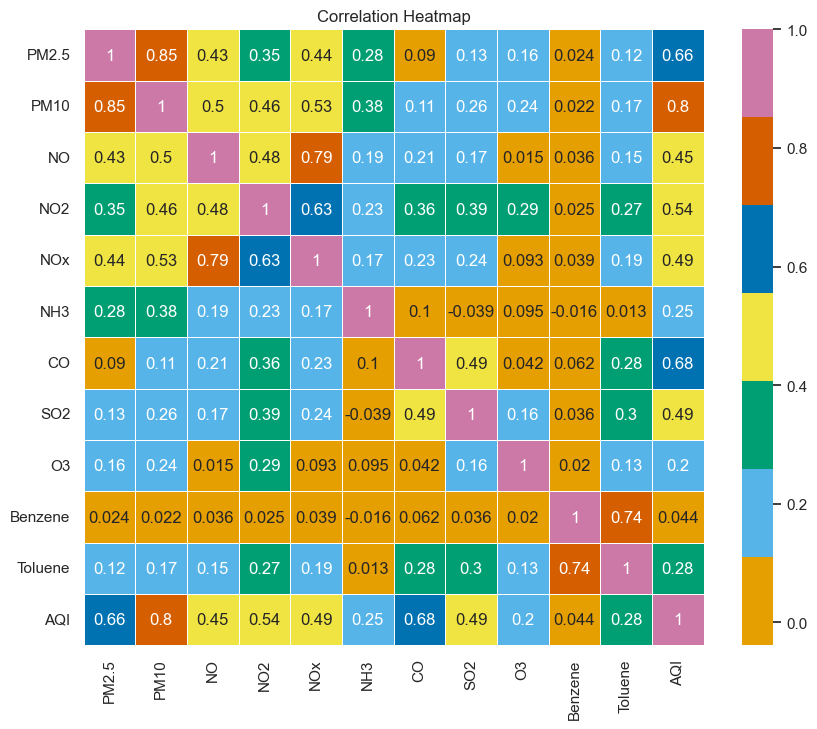

In [173]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=okabe_ito_palette, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<b>Concept:</b> 
<ol>
<li><b>Understanding relationships:</b></li>
    <ul>
        <li>It helps in understanding the relationships between different variables in a dataset. </li>
        <li>Positive correlation indicates that as one variable increases, the other tends to increase as well, while negative correlation indicates that as one variable increases, the other tends to decrease.</li>
    </ul>
    <br>
<li><b>Feature selection:</b></li>
    <ul>
        <li>In machine learning, a correlation matrix can be used for feature selection.</li>
        <li>Highly correlated features may provide redundant information, and including them in a model might not improve its performance.</li>
        <li>Identifying and removing highly correlated features can simplify the model and enhance interpretability.</li></ul>
</ol>
<b>Observation:</b> 
<ol>
    <li>Only <b>PM2.5</b>, <b>PM10</b>, <b>NO2</b>, and <b>CO</b> has a correlation with AQI that is > 50. </li>
    <li>The features that has a correlation with AQI that is > 50, is less than half of all features (11) </li>
</ol>
<b>Action:</b> 
<ol>
    <li>To build a more reliable model, all features will be included. </li>
</ol>

Note: The following are the global functions that will be used throughout the notebook.

In [174]:
'''
FUNCTION 1
1. Description: This function returns the unique values of the specify feature
2. Parameters: column_nameL name of feature
3. Return value: none
4. Comments: none
'''   
def getUniqueValues(column_name):
    # Get the specific column as a list
    specific_column_list = data[column_name].tolist()
    # Get unique values from the list
    unique_values = list(set(specific_column_list))
    print("List of unique values in "+column_name+":\n"+str(unique_values))
   
    if column_name in data.columns:
        specific_column_series = data[column_name]
        unique_values_count = specific_column_series.nunique()
        return ("Number of unique values:" + str(unique_values_count))
    else:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return None
    
'''
FUNCTION 2
1. Description: This function returns the unique values of the specify feature in a list
2. Parameters: column_name: name of feature
3. Return value: none
4. Comments: none
'''   
def getUniqueValuesList(column_name):
    specific_column_list = data[column_name].tolist()
    unique_values = list(set(specific_column_list))
    
    return str(unique_values)  

'''
FUNCTION 3
1. Description: This function returns associated rows of the specify feature
2. Parameters: column_name: name of feature, data_name: value of feature
3. Return value: none
4. Comments: none
'''   
def getAssociatedRows(column_name, data_name):
    print(data[data[column_name] == data_name])

'''
FUNCTION 4
1. Description: This function returns associated row count of the specify feature
2. Parameters: column_name: name of feature, data_name: value of feature
3. Return value: none
4. Comments: none
'''   
def getAssociatedRowsCount(column_name, data_name):
    rowCount = len(data[data[column_name] == data_name])
    
    return rowCount

'''
FUNCTION 5
1. Description: This function returns associated row count of the specify feature with a single feature condition
2. Parameters: column_name:name of feature, value: value of feature, condition_column: conditioned feature  
3. Return value: num_rows
4. Comments: column_name:City, value:Ahmedabad, condition_column: AQI_Bucket
'''   
def getAssociatedRowsCondition(column_name, value, condition_column):
    #.notna() indicates that this filtered_data only is only when the feature condition is not empty
    filtered_data = data[data[condition_column].notna() & (data[column_name] == value)]

    # Get the number of rows in the filtered DataFrame
    num_rows = filtered_data.shape[0]

    # Print the number of rows
    return num_rows    

In [175]:
getUniqueValues(City)

List of unique values in City:
['Chennai', 'Hyderabad', 'Guwahati', 'Ahmedabad', 'Aizawl', 'Bengaluru', 'Chandigarh', 'Jorapokhar', 'Jaipur', 'Amritsar', 'Delhi', 'Patna', 'Thiruvananthapuram', 'Gurugram', 'Ernakulam', 'Coimbatore', 'Shillong', 'Bhopal', 'Amaravati', 'Kolkata', 'Visakhapatnam', 'Mumbai', 'Brajrajnagar', 'Lucknow', 'Talcher', 'Kochi']


'Number of unique values:26'

In [176]:
print("Unique values of City in a list")
getUniqueValuesList(City)

Unique values of City in a list


"['Chennai', 'Hyderabad', 'Guwahati', 'Ahmedabad', 'Aizawl', 'Bengaluru', 'Chandigarh', 'Jorapokhar', 'Jaipur', 'Amritsar', 'Delhi', 'Patna', 'Thiruvananthapuram', 'Gurugram', 'Ernakulam', 'Coimbatore', 'Shillong', 'Bhopal', 'Amaravati', 'Kolkata', 'Visakhapatnam', 'Mumbai', 'Brajrajnagar', 'Lucknow', 'Talcher', 'Kochi']"

In [177]:
print("Ahmedabad city all rows:")
getAssociatedRows(City, "Ahmedabad")

Ahmedabad city all rows:
           City       Date  PM2.5    PM10     NO    NO2    NOx  NH3     CO  \
0     Ahmedabad 2015-01-01    NaN     NaN   0.92  18.22  17.15  NaN   0.92   
1     Ahmedabad 2015-01-02    NaN     NaN   0.97  15.69  16.46  NaN   0.97   
2     Ahmedabad 2015-01-03    NaN     NaN  17.40  19.30  29.70  NaN  17.40   
3     Ahmedabad 2015-01-04    NaN     NaN   1.70  18.48  17.97  NaN   1.70   
4     Ahmedabad 2015-01-05    NaN     NaN  22.10  21.42  37.76  NaN  22.10   
...         ...        ...    ...     ...    ...    ...    ...  ...    ...   
2004  Ahmedabad 2020-06-27  62.12  118.67   9.18  56.35  19.86  NaN   0.49   
2005  Ahmedabad 2020-06-28  31.57     NaN   6.37  23.99  16.40  NaN   0.52   
2006  Ahmedabad 2020-06-29  29.75  127.98   9.06  25.15  18.92  NaN   0.67   
2007  Ahmedabad 2020-06-30  40.02  121.10   7.09  58.92  33.41  NaN   0.73   
2008  Ahmedabad 2020-07-01  37.63     NaN   4.42  35.04  20.17  NaN   0.28   

        SO2      O3  Benzene  Toluene 

In [178]:
print("Number of rows when City is Ahmedabad:")
getAssociatedRowsCount(City, "Ahmedabad")

Number of rows when City is Ahmedabad:


2009

In [179]:
print("Number of rows Ahmedabad has when AQI is notna:")
getAssociatedRowsCondition(City, "Ahmedabad", AQI)

Number of rows Ahmedabad has when AQI is notna:


1334

<hr>
<center><h1>Chapter 3: Data Preparation</h1></center>
<hr>

3.1. Drop rows with empty years
<br>3.2. Identifying outliers
<br>3.3. Update AQI_Bucket to numerical representation
<br>3.4. Fill all empty values with average values for each respective year (except for AQI_Bucket)
<br>3.5. Fill up the AQI_Bucket
<hr>

In [180]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,NaN,NaN
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,472.0,Severe
19846,Lucknow,2015-01-01,NaN,NaN,2.11,13.46,4.57,NaN,12.15,169.57,25.92,1.35,3.93,NaN,NaN
21855,Mumbai,2015-01-01,NaN,NaN,NaN,NaN,27.38,NaN,0.00,NaN,NaN,0.00,0.00,NaN,NaN


<h2> 3.1. Drop rows with empty years </h2>

Note: The below code is to observe an estimate of percentage of missing AQI values for each city 

In [181]:
city_list = eval(getUniqueValuesList(City))

# SORT ROWS ALPHABETICALLY
city_list.sort()

for i in range(len(city_list)):
    rowCount = getAssociatedRowsCount(City,city_list[i])
    rowCountCondition = getAssociatedRowsCondition(City,city_list[i],'AQI')
    percentageCountNotNull = round((((rowCountCondition)/rowCount)*100),2)
    percentageCountNull = round((((rowCount-rowCountCondition)/rowCount)*100),2)
    
    print(str(i+1)+"."+"\033[1m"+city_list[i]+"\033[0m (Total rows",rowCount,")")
    print("----"*20)
    print("\033[1mNot null AQI\033[0m")
    print("----"*20)
    print("• Total value count:",rowCountCondition)
    print("• Percentage:",percentageCountNotNull,"%")
    print("----"*20,"\n")
    print("\033[1mNull AQI\033[0m")
    print("----"*20)
    print("• Total value count:",rowCount-rowCountCondition)
    print("• Percentage:", percentageCountNull,"%")
    print("----"*20)
    print("")

1.Ahmedabad (Total rows 2009 )
--------------------------------------------------------------------------------
Not null AQI
--------------------------------------------------------------------------------
• Total value count: 1334
• Percentage: 66.4 %
-------------------------------------------------------------------------------- 

Null AQI
--------------------------------------------------------------------------------
• Total value count: 675
• Percentage: 33.6 %
--------------------------------------------------------------------------------

2.Aizawl (Total rows 113 )
--------------------------------------------------------------------------------
Not null AQI
--------------------------------------------------------------------------------
• Total value count: 111
• Percentage: 98.23 %
-------------------------------------------------------------------------------- 

Null AQI
--------------------------------------------------------------------------------
• Total value count: 2
•

Note: The below code is to observe an estimate of percentage of missing AQI values for each city based on each year

In [182]:
'''
1. Description: This function check the number of rows which are na, notna and the total number of roles
2. Parameters: city_name
3. Return value: none
4. Comments: none
'''
def getYearRows(city_name):

    tempFiltered_data=0
    # Convert the 'Date' column to datetime
    data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
   
    # Iterate over the years from 2015 to 2019
    for yearCondition in range(2015, 2021):
        # Filter rows based on the current year
        data_year = data[data['Date'].dt.year == yearCondition]

        # Filter rows for the specified city and where 'AQI_Bucket' is not NaN
        filtered_data_na = data_year[(data_year['City'] == city_name) & (data_year['AQI'].isna())]
        filtered_data_notna = data_year[(data_year['City'] == city_name) & (data_year['AQI'].notna())]
        tempFiltered_data += len(filtered_data_na)
        print("----"*20)
        print(f"Year {yearCondition}")
        print("----"*20)
        print(f"Total rows (na): {len(filtered_data_na)}")
        print(f"Total rows (notna): {len(filtered_data_notna)}")
        print(f"Total rows: {len(filtered_data_na)+len(filtered_data_notna)}")

# SORT ROWS ALPHABETICALLY
city_list.sort()
i=0
for city in city_list:
    print(str(i+1)+"\033[1m."+city+"\033[0m")
    getYearRows(city)
    print("")
    i+=1

1.Ahmedabad
--------------------------------------------------------------------------------
Year 2015
--------------------------------------------------------------------------------
Total rows (na): 102
Total rows (notna): 263
Total rows: 365
--------------------------------------------------------------------------------
Year 2016
--------------------------------------------------------------------------------
Total rows (na): 249
Total rows (notna): 117
Total rows: 366
--------------------------------------------------------------------------------
Year 2017
--------------------------------------------------------------------------------
Total rows (na): 296
Total rows (notna): 69
Total rows: 365
--------------------------------------------------------------------------------
Year 2018
--------------------------------------------------------------------------------
Total rows (na): 8
Total rows (notna): 357
Total rows: 365
-----------------------------------------------------------

--------------------------------------------------------------------------------
Year 2018
--------------------------------------------------------------------------------
Total rows (na): 105
Total rows (notna): 260
Total rows: 365
--------------------------------------------------------------------------------
Year 2019
--------------------------------------------------------------------------------
Total rows (na): 43
Total rows (notna): 322
Total rows: 365
--------------------------------------------------------------------------------
Year 2020
--------------------------------------------------------------------------------
Total rows (na): 62
Total rows (notna): 121
Total rows: 183

8.Chandigarh
--------------------------------------------------------------------------------
Year 2015
--------------------------------------------------------------------------------
Total rows (na): 0
Total rows (notna): 0
Total rows: 0
--------------------------------------------------------------

--------------------------------------------------------------------------------
Year 2018
--------------------------------------------------------------------------------
Total rows (na): 0
Total rows (notna): 0
Total rows: 0
--------------------------------------------------------------------------------
Year 2019
--------------------------------------------------------------------------------
Total rows (na): 7
Total rows (notna): 312
Total rows: 319
--------------------------------------------------------------------------------
Year 2020
--------------------------------------------------------------------------------
Total rows (na): 0
Total rows (notna): 183
Total rows: 183

15.Hyderabad
--------------------------------------------------------------------------------
Year 2015
--------------------------------------------------------------------------------
Total rows (na): 90
Total rows (notna): 272
Total rows: 362
-----------------------------------------------------------------

--------------------------------------------------------------------------------
Year 2015
--------------------------------------------------------------------------------
Total rows (na): 0
Total rows (notna): 0
Total rows: 0
--------------------------------------------------------------------------------
Year 2016
--------------------------------------------------------------------------------
Total rows (na): 0
Total rows (notna): 0
Total rows: 0
--------------------------------------------------------------------------------
Year 2017
--------------------------------------------------------------------------------
Total rows (na): 12
Total rows (notna): 0
Total rows: 12
--------------------------------------------------------------------------------
Year 2018
--------------------------------------------------------------------------------
Total rows (na): 126
Total rows (notna): 239
Total rows: 365
--------------------------------------------------------------------------------
Yea

Note: The below code is to observe an estimate of percentage of missing AQI values for each city based on each year

In [183]:
'''
1. Description: This function checks for which year have an empty AQI_Bucket
2. Parameters: city_name
3. Return value: none
4. Comments: none
'''   
def getEmptyYearRows(city_name):
    # Convert the 'Date' column to datetime
    data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
   
    # Iterate over the years from 2015 to 2019
    for yearCondition in range(2015, 2021):
        # Filter rows based on the current year
        data_year = data[data['Date'].dt.year == yearCondition]

        # Filter rows for the specified city
        filtered_data_city = data_year[data_year['City'] == city_name]

        # Count the number of rows where 'AQI_Bucket' is NaN
        count_na = filtered_data_city['AQI'].isna().sum()

        # Count the number of rows where 'AQI_Bucket' is not NaN
        count_notna = filtered_data_city['AQI'].notna().sum()

        # Check if both counts are zero
        if count_na == 0 and count_notna == 0:
            print(f"{yearCondition}")
            
# SORT ROWS ALPHABETICALLY
city_list.sort()
i=0
for city in city_list:
    print("----"*20)
    print(str(i+1)+"\033[1m."+city+"\033[0m")
    print("----"*20)
    getEmptyYearRows(city)
    print("")
    i+=1

--------------------------------------------------------------------------------
1.Ahmedabad
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
2.Aizawl
--------------------------------------------------------------------------------
2015
2016
2017
2018
2019

--------------------------------------------------------------------------------
3.Amaravati
--------------------------------------------------------------------------------
2015
2016

--------------------------------------------------------------------------------
4.Amritsar
--------------------------------------------------------------------------------
2015
2016

--------------------------------------------------------------------------------
5.Bengaluru
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
6.B

Note: In the bar graph below, the color parameter (okabe_ito_palette) is used to specify the colors for each year (2015,2016,2017,2018,2019,2020) present in each city.  

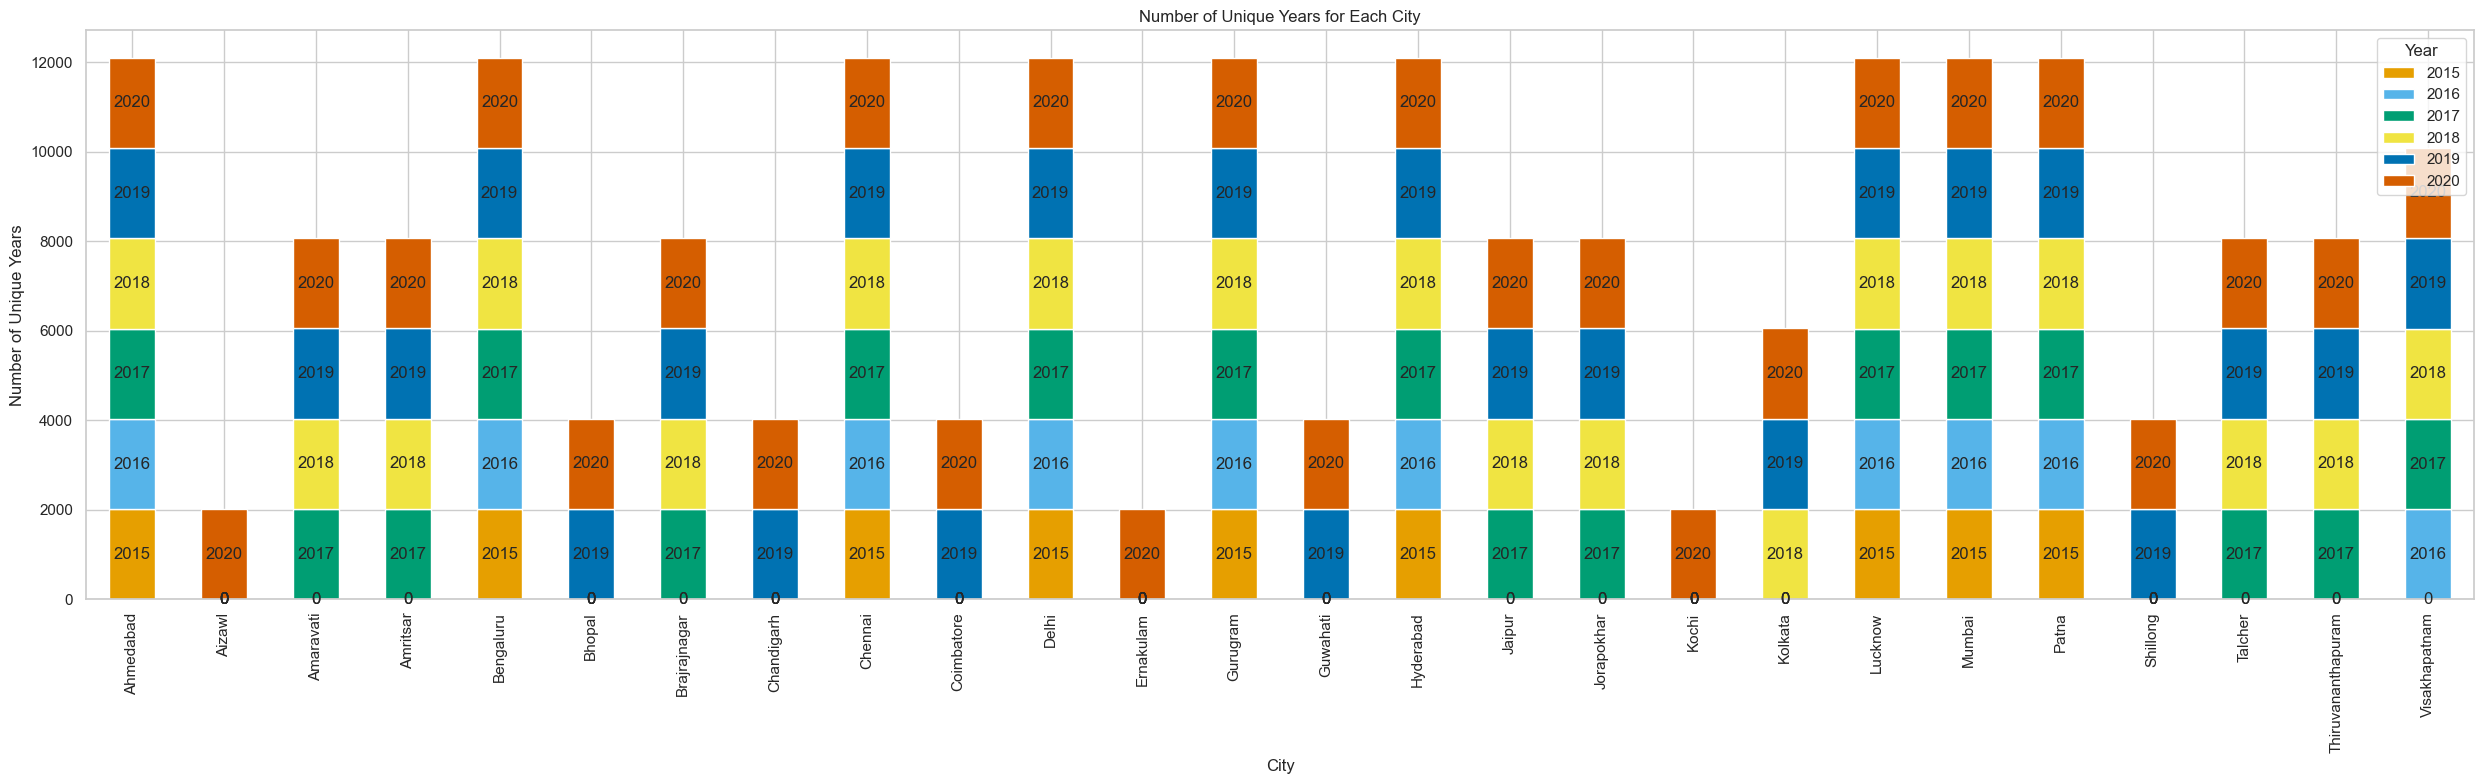

In [184]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Extract years from the 'Date' column
data['Year'] = data['Date'].dt.year

# Filter out rows where 'Date' is not empty
non_empty_data = data[data['Date'].notna()]

# Drop duplicate rows to get unique city-year pairs
unique_city_years = non_empty_data[['City', 'Year']].drop_duplicates()

# Pivot the data to prepare for a stacked bar chart
pivot_data = unique_city_years.pivot(index='City', columns='Year', values='Year').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(25, 8))

# Stacked bar chart with specified colors
pivot_data.plot(kind='bar', stacked=True, color=okabe_ito_palette, ax=ax)

ax.set_ylabel("Number of Unique Years")
ax.set_xlabel("City")
ax.set_title("Number of Unique Years for Each City")

# Add labels for each layer (year)
for patch in ax.patches:
    width, height = patch.get_width(), patch.get_height()
    x, y = patch.get_xy()    
    ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center')

plt.tight_layout()
plt.show()

<b>Observation:</b>
<ol>
    <li>2015 to 2020 = 6 years</li>
    <li>Mean of 2015 to 2020 = 3 years. At least, 3 years is needed for the data to be accurate for building a machine learning model.  </li>
    <li>2015, 2016 is empty from most of the cities</li> 
</ol>
    
<b>Action:</b>
<ol>
    <li>2015 and 2016 will be discarded from the data</li>
</ol>

Note: The bar graph created an extra <b>Year</b> column. This column will be removed.

In [185]:
data.head(2)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,NaN,NaN,2015
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN,2015


In [186]:
data = data.drop('Year', axis=1)

In [187]:
data.head(2)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,NaN,NaN
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN


Note: The below code is to drop <b>2015</b> and <b>2016</b> from <b>Year</b> column.

In [188]:
import pandas as pd

def dropYears(data, years_to_drop):
    # Check if 'Date' column exists in the DataFrame
    if 'Date' not in data.columns:
        print("Error: 'Date' column not found in the DataFrame.")
        return

    try:
        # Convert the 'Date' column to datetime with the correct format
        data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
    except ValueError as e:
        print(f"Error: {e}")
        return

    # Filter rows where the year is not in the specified list of years to drop
    data = data[~data['Date'].dt.year.isin(years_to_drop)].reset_index(drop=True)

    return data

# Specify the years to drop
years_to_drop = [2015, 2016]

# Call the function to drop rows for the specified years and update the DataFrame
data = dropYears(data, years_to_drop)

In [189]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Gurugram,2017-01-01,216.51,NaN,7.89,10.67,NaN,NaN,21.61,7.48,13.66,2.90,28.98,385.0,Very Poor
1,Chennai,2017-01-01,44.56,NaN,6.62,15.04,12.78,NaN,0.18,5.80,19.33,0.21,0.12,118.0,Moderate
2,Bengaluru,2017-01-01,20.13,105.61,7.33,42.34,0.00,NaN,0.77,4.80,25.90,3.65,2.04,88.0,Satisfactory
3,Patna,2017-01-01,199.00,NaN,8.72,18.69,27.48,NaN,1.16,0.95,2.69,0.18,0.48,332.0,Very Poor
4,Mumbai,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN


<h2> 3.2. Identifying Outliers</h2>

<h3>a. Box-plot</h3>
<br>
In a boxplot, outliers are individual data points that fall outside the whiskers, indicating values significantly different from the majority of the data.
<br><br>
<center>
    <img src="IMAGES/boxplot.png" width="500" height="300">
</center>
<br>

[Source](https://www.wccusd.net/cms/lib/CA01001466/Centricity/domain/60/lessons/grade%206%20lessons/WCCUSDBoxPlotsDemystified201516v3.pdf)

In [190]:
print(data.columns)

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket'],
      dtype='object')


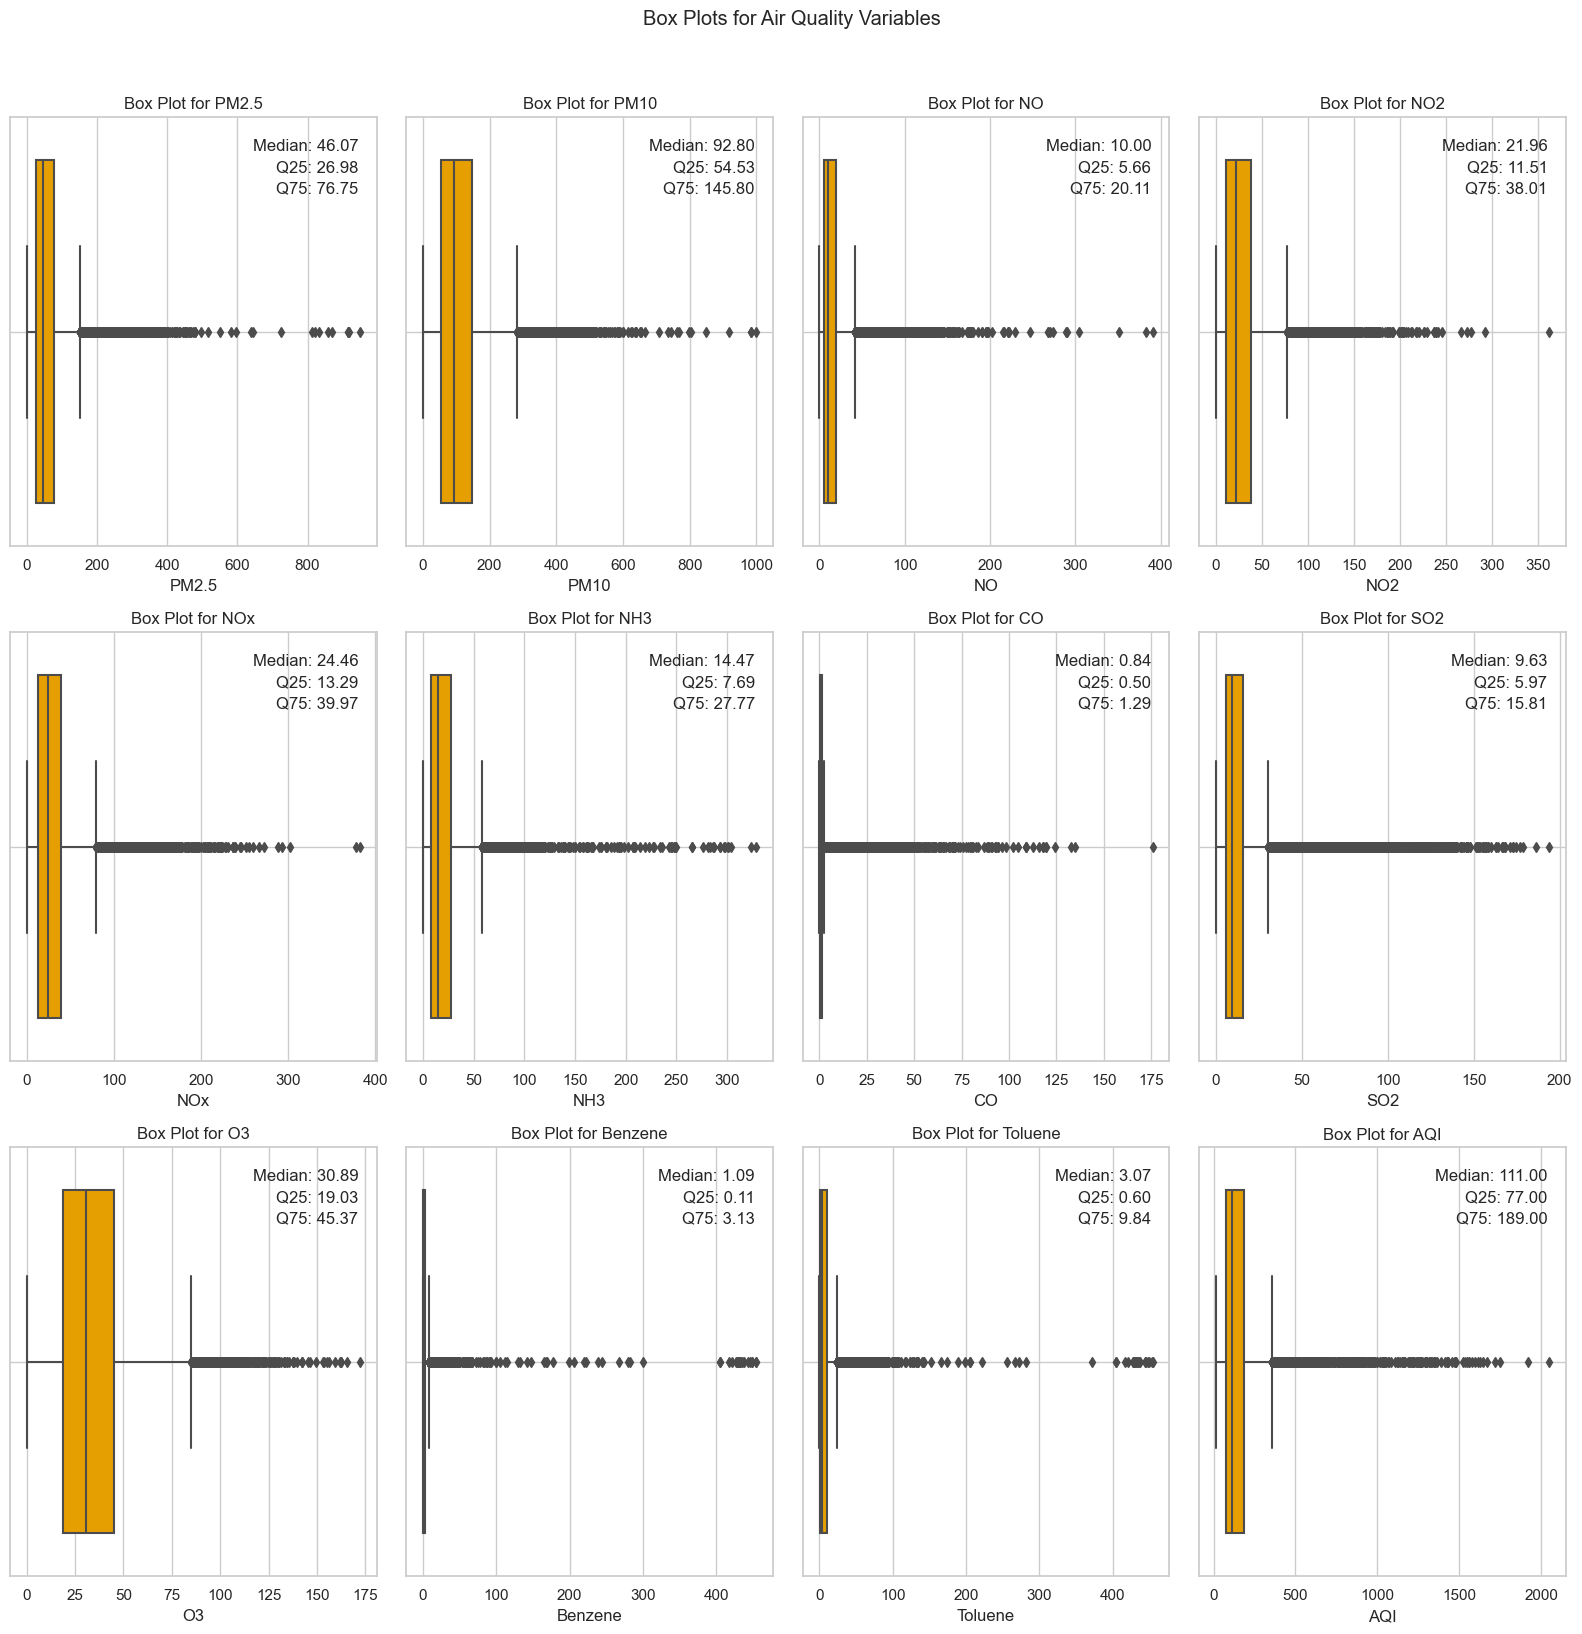

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is stored in a DataFrame called 'df'
# You may need to adjust column names based on your actual column names
columns_of_interest = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI']

# Create subplots for each relevant column
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 16))
fig.suptitle('Box Plots for Air Quality Variables', y=1.02)

# Flatten the 2D array of subplots
axes = axes.flatten()

# Iterate over columns and create box plots
for i, column in enumerate(columns_of_interest):
    sns.boxplot(x=data[column], ax=axes[i], boxprops=dict(facecolor='#E69F00'))
    axes[i].set_title(f'Box Plot for {column}')
    
    # Add a grid to each subplot
    axes[i].grid(True)
    
    # Calculate and annotate percentiles
    median_val = data[column].median()
    q25 = data[column].quantile(0.25)
    q75 = data[column].quantile(0.75)
    
    # Adjusted text position for the median label
    axes[i].text(0.95, 0.95, f'Median: {median_val:.2f}', transform=axes[i].transAxes, verticalalignment='top', horizontalalignment='right')
    axes[i].text(0.95, 0.90, f'Q25: {q25:.2f}', transform=axes[i].transAxes, verticalalignment='top', horizontalalignment='right')
    axes[i].text(0.95, 0.85, f'Q75: {q75:.2f}', transform=axes[i].transAxes, verticalalignment='top', horizontalalignment='right')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

<b>Observation:</b>
<ol>
    <li>Majority of the data from the dataset are outliers.</li>
</ol>
    
<b>Resolution:</b>
<ol>
    <li>Outliers are assumed as the cause of air pollution disaster.</li>
    <li>The outliers will remain in the dataset.</li>
</ol>

<h3>b. Z-Score</h3>
<br>
To identify outliers using z-scores, you typically consider data points that fall beyond a certain threshold. A common threshold is to consider values with a z-score beyond ±3 as potential outliers. Values beyond this range are often considered unusually far from the mean.
<br><br>
<center>
    <img src="IMAGES/z-score.png" width="500" height="300">
</center>
<br>

[Source](https://www.scaler.com/topics/data-mining-tutorial/outlier-detection-methods-in-data-mining/)

In [192]:
import numpy as np

columns_of_interest = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','AQI']

# Set the z-score threshold for identifying outliers
z_score_threshold = 3

# Identify and print outliers based on z-scores
for column in columns_of_interest:
    mean_value = data[column].mean()
    std_dev = data[column].std()
    z_scores = (data[column] - mean_value) / std_dev
    
    outliers = data[np.abs(z_scores) > z_score_threshold][column]
    
    print(f'Potential outliers for {column}:\n{outliers}\n')

Potential outliers for PM2.5:
11       247.79
15       307.27
16       349.97
20       255.33
23       276.39
          ...  
18639    271.49
18935    378.08
19153    342.42
19185    354.44
23055    308.79
Name: PM2.5, Length: 398, dtype: float64

Potential outliers for PM10:
6        402.31
11       440.18
20       390.67
114      423.24
129      426.02
          ...  
22511    586.27
22523    486.99
22555    413.89
22860    502.09
23055    589.39
Name: PM10, Length: 310, dtype: float64

Potential outliers for NO:
6        103.24
11       221.03
15       100.68
20       155.29
33       186.07
          ...  
22564     88.06
22585     95.77
22610    102.83
22637     88.74
23080    229.10
Name: NO, Length: 461, dtype: float64

Potential outliers for NO2:
330      362.21
534      109.62
549      109.13
596      109.84
610      114.26
          ...  
17731    106.63
17775    110.17
17838    140.56
18761    104.77
19981    124.33
Name: NO2, Length: 372, dtype: float64

Potential outliers f

<h2> 3.3. Update AQI_Bucket to numerical representation</h2>
<br>
Based on the data given, the Air Quality Index (AQI) can be divided by the following 6 different ranges,
<br><br>
<center>
    <img src="IMAGES/AIR_QUALITY_RANGE.png" width="600" height="400">
</center>

[AQI CHART](https://www.lung.org/clean-air/outdoors/air-quality-index#:~:text=Air%20pollution%20levels%20are%20measured,immediate%20danger%20to%20the%20public)

Note: The below code is to check the unique values of AQI.

In [193]:
getUniqueValues(AQI_Bucket)

List of unique values in AQI_Bucket:
[nan, 'Good', 'Severe', 'Satisfactory', 'Moderate', 'Very Poor', 'Poor']


'Number of unique values:6'

Note: The below code is to check if any AQI value fall below 0.

In [194]:
# Check if any AQI value exceeds 500
below_0 = any(data['AQI'] < 0)

# Return True if any value exceeds 500, otherwise False
print(below_0)

False


<b>Observation:</b>
<ol>
    <li>There are no AQI value that falls below 0.</li>
</ol>
    
<b>Resolution:</b>
<ol>
    <li>It can be assumed that NaN in AQI_Bucket is not the cause of any values from AQI that falls below 0.</li>
</ol>

In [195]:
# Mapping categories to numerical values
category_mapping = {
    'Good': 0,
    'Satisfactory': 1,
    'Moderate': 2,
    'Poor': 3,
    'Very Poor': 4,
    'Severe': 5  # If 'Severe' is present in your data
}
# Replace category values with numerical values
data['AQI_Bucket'] = data['AQI_Bucket'].replace(category_mapping)

In [196]:
getUniqueValues(AQI_Bucket)

List of unique values in AQI_Bucket:
[nan, 1.0, 2.0, nan, 4.0, nan, nan, nan, 5.0, nan, nan, nan, 3.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

'Number of unique values:6'

<h2>3.4. Fill all empty values with average values for each respective year (except for AQI_Bucket)</h2>

In [197]:
city_list = eval(getUniqueValuesList(City))

# SORT ROWS ALPHABETICALLY
city_list.sort()
print(city_list)

['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam']


Note: The code below is to test the logic of filling up the average of PM2.5 for Ahmedabad for each respective year.

In [198]:
tempFiltered_data = []

for yearCondition in range(2017, 2021):
    # Filter rows based on the current year
    data_year = data[data['Date'].dt.year == yearCondition]
    print("--" * 35)
    print("\033[1mYear", yearCondition, ", Average PM2.5 for Ahmedabad\033[0m")
    print("--" * 35)
    
    # Iterate over the months from January to May
    for monthCondition in range(1, 13):
        print(f"\n\033[1mMonth {monthCondition}\033[0m")
        
        # Filter rows based on the current month, year, and city (Ahmedabad)
        filtered_data_notna = data_year[
            (data_year['Date'].dt.month == monthCondition) &
            (data_year['City'] == 'Ahmedabad') &
            (data_year['PM2.5'].notna())
        ]
        
        # Calculate the average PM2.5 for the current month and year in Ahmedabad
        if not filtered_data_notna.empty:
            # Find the average
            average = filtered_data_notna['PM2.5'].mean()
            print(f"Ahmedabad: {average}")
            tempFiltered_data.append(average)
        else:
            print("Ahmedabad: No data")


----------------------------------------------------------------------
Year 2017 , Average PM2.5 for Ahmedabad
----------------------------------------------------------------------

Month 1
Ahmedabad: No data

Month 2
Ahmedabad: No data

Month 3
Ahmedabad: No data

Month 4
Ahmedabad: No data

Month 5
Ahmedabad: No data

Month 6
Ahmedabad: No data

Month 7
Ahmedabad: No data

Month 8
Ahmedabad: No data

Month 9
Ahmedabad: No data

Month 10
Ahmedabad: 86.16357142857143

Month 11
Ahmedabad: 106.12285714285717

Month 12
Ahmedabad: 74.2416129032258
----------------------------------------------------------------------
Year 2018 , Average PM2.5 for Ahmedabad
----------------------------------------------------------------------

Month 1
Ahmedabad: 88.85129032258065

Month 2
Ahmedabad: 102.19851851851854

Month 3
Ahmedabad: 97.91612903225807

Month 4
Ahmedabad: 81.73166666666667

Month 5
Ahmedabad: 53.55193548387097

Month 6
Ahmedabad: 56.82100000000001

Month 7
Ahmedabad: 57.5709677419355



Note: The code below is to test the logic of filling up the average of PM10 for Ahmedabad for each respective year.

In [199]:
tempFiltered_data = []

for yearCondition in range(2017, 2021):
    # Filter rows based on the current year
    data_year = data[data['Date'].dt.year == yearCondition]
    print("--" * 35)
    print("\033[1mYear", yearCondition, ", Average PM10 for Ahmedabad\033[0m")
    print("--" * 35)

    # Iterate over the months from January to May
    for monthCondition in range(1, 13):
        print(f"\n\033[1mMonth {monthCondition}\033[0m")

        # Filter rows based on the current month, year, and city (Ahmedabad)
        filtered_data_notna = data_year[
            (data_year['Date'].dt.month == monthCondition) &
            (data_year['City'] == 'Ahmedabad') &
            (data_year['PM10'].notna())  # Change 'PM2.5' to 'PM10' for consistency
        ]

        # Calculate the average PM10 for the current month and year in Ahmedabad
        if not filtered_data_notna.empty:
            # Find the average
            average = filtered_data_notna['PM10'].mean()
            # If average is NaN, set it to 0
            average = 0 if pd.isna(average) else average
            print(f"Ahmedabad: {average}")
            tempFiltered_data.append(average)
        else:
            print("Ahmedabad: No data")

# Now, tempFiltered_data contains the average PM10 for each month and year in Ahmedabad

----------------------------------------------------------------------
Year 2017 , Average PM10 for Ahmedabad
----------------------------------------------------------------------

Month 1
Ahmedabad: No data

Month 2
Ahmedabad: No data

Month 3
Ahmedabad: No data

Month 4
Ahmedabad: No data

Month 5
Ahmedabad: No data

Month 6
Ahmedabad: No data

Month 7
Ahmedabad: No data

Month 8
Ahmedabad: No data

Month 9
Ahmedabad: No data

Month 10
Ahmedabad: No data

Month 11
Ahmedabad: No data

Month 12
Ahmedabad: No data
----------------------------------------------------------------------
Year 2018 , Average PM10 for Ahmedabad
----------------------------------------------------------------------

Month 1
Ahmedabad: No data

Month 2
Ahmedabad: No data

Month 3
Ahmedabad: No data

Month 4
Ahmedabad: No data

Month 5
Ahmedabad: No data

Month 6
Ahmedabad: No data

Month 7
Ahmedabad: No data

Month 8
Ahmedabad: No data

Month 9
Ahmedabad: No data

Month 10
Ahmedabad: No data

Month 11
Ahmedaba

Note: The function below is the code to fill up the average of each features based on each city for each respective year.

In [200]:
'''
FUNCTION 1
1. Description: This function fills up the average of each features based on each city for each respective year.
2. Parameters: data, feature_name, city_list
3. Return value: none
4. Comments: none
'''   
def fill_na_with_yearly_average(data, feature_name, city_list):
    # Iterate over the years 2017 to 2021
    for year in range(2017, 2021):

        # Iterate over the cities in the city list
        for city in city_list:
            # Calculate the yearly average for the current city and year
            yearly_avg_feature = data.loc[(data['City'] == city) & (data['Date'].dt.year == year), feature_name].mean()
            
            # If yearly_avg_feature is NaN, set it to 0
            yearly_avg_feature = 0 if pd.isna(yearly_avg_feature) else yearly_avg_feature

            # Identify rows with missing values for the current city and year
            missing_rows = (data[feature_name].isna()) & (data['City'] == city) & (data['Date'].dt.year == year)

            # Fill the missing values with the corresponding yearly average for the current city
            data.loc[missing_rows, feature_name] = yearly_avg_feature

            # Verify that missing values are filled for the current city and year
            #print(f"{city}: {data.loc[(data['City'] == city) & (data['Date'].dt.year == year), feature_name].isna().sum()} missing values filled.")

Note: The table below is before the dataset is filled with the average.

In [201]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Gurugram,2017-01-01,216.51,NaN,7.89,10.67,NaN,NaN,21.61,7.48,13.66,2.90,28.98,385.0,4.0
1,Chennai,2017-01-01,44.56,NaN,6.62,15.04,12.78,NaN,0.18,5.80,19.33,0.21,0.12,118.0,2.0
2,Bengaluru,2017-01-01,20.13,105.61,7.33,42.34,0.00,NaN,0.77,4.80,25.90,3.65,2.04,88.0,1.0
3,Patna,2017-01-01,199.00,NaN,8.72,18.69,27.48,NaN,1.16,0.95,2.69,0.18,0.48,332.0,4.0
4,Mumbai,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
print(city_list)

['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam']


In [203]:
fill_na_with_yearly_average(data,'PM2.5',city_list)
fill_na_with_yearly_average(data,'PM10',city_list)
fill_na_with_yearly_average(data,'NO',city_list)
fill_na_with_yearly_average(data,'NO2',city_list)
fill_na_with_yearly_average(data,'NOx',city_list)
fill_na_with_yearly_average(data,'NH3',city_list)
fill_na_with_yearly_average(data,'CO',city_list)
fill_na_with_yearly_average(data,'SO2',city_list)
fill_na_with_yearly_average(data,'O3',city_list)
fill_na_with_yearly_average(data,'Benzene',city_list)
fill_na_with_yearly_average(data,'Toluene',city_list)
fill_na_with_yearly_average(data,'AQI',city_list)

Note: The table below is after the dataset is filled with the average.

In [208]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Gurugram,2017-01-01,216.51,395.40,7.89,10.67,16.633418,0.000000,21.61,7.48,13.66,2.900000,28.980000,385.0,4.0
1,Chennai,2017-01-01,44.56,0.00,6.62,15.04,12.780000,169.113111,0.18,5.80,19.33,0.210000,0.120000,118.0,2.0
2,Bengaluru,2017-01-01,20.13,105.61,7.33,42.34,0.000000,27.365060,0.77,4.80,25.90,3.650000,2.040000,88.0,1.0
3,Patna,2017-01-01,199.00,0.00,8.72,18.69,27.480000,0.000000,1.16,0.95,2.69,0.180000,0.480000,332.0,4.0
4,Mumbai,2017-01-01,0.00,0.00,0.00,0.00,58.296047,0.000000,0.00,98.74,17.24,0.002086,0.005571,0.0,NaN


<h2>3.4. Fill up the AQI_Bucket</h2>
<br>
Based on the data given, the Air Quality Index (AQI) can be divided by the following 6 different ranges,
<br><br>
<center>
    <img src="IMAGES/AIR_QUALITY_RANGE.png" width="600" height="400">
</center>

[Source](https://www.lung.org/clean-air/outdoors/air-quality-index#:~:text=Air%20pollution%20levels%20are%20measured,immediate%20danger%20to%20the%20public)

Note: The below code is to check if there is any AQI values that exceed 500.

In [212]:
# Check if any AQI value exceeds 500
exceeded_500 = any(data['AQI'] > 500)

# Return True if any value exceeds 500, otherwise False
print(exceeded_500)

True


<b>Observation:</b>
<ol>
    <li>There are AQI values that exceeds 500.</li>
</ol>
    
<b>Action:</b>
<ol>
    <li>A new category for AQI bucket (6) for AQI values exceeding 500 will be created as shown in the table below.</li>
</ol>
<table border="1">
  <thead>
    <tr>
      <th>AQI Bucket</th>
      <th>0</th>
      <th>1</th>
      <th>2</th>
      <th>3</th>
      <th>4</th>
      <th>5</th>
      <th>6</th>
      </tr>
  </thead>
  <tbody>
    <tr>
      <td>Range</td>
      <td>0 to 50</td>
      <td>51 to 100</td>
      <td>101 to 150</td>
      <td>151 to 200</td>
      <td>201 to 300</td>
      <td>301 to 500</td>
      <td>>500</td>
    </tr>
    <tr>
      <td>Label</td>
      <td>Good</td>
      <td>Moderate</td>
      <td>Unhealthy (Sensitive Groups)</td>
      <td>Unhealthy</td>
      <td>Very Unhealthy</td>
      <td>Hazardous</td>
      <td>Death</td>
    </tr>
  </tbody>
</table>

Note: The below code replaces the AQI_Bucket labels with the associated bucket number.

In [218]:
# Define AQI buckets and corresponding labels
bins = [0, 50, 100, 150, 200, 300, 500, float('inf')]
labels = [0, 1, 2, 3, 4, 5, 6]  # Adjusted the length of labels

# Update 'AQI_Bucket' column based on the 'AQI' values
data['AQI_Bucket'] = pd.cut(data['AQI'], bins=bins, labels=labels, include_lowest=True, right=False)

# Display the updated DataFrame
print(data)

                     City       Date   PM2.5    PM10     NO    NO2        NOx  \
0                Gurugram 2017-01-01  216.51  395.40   7.89  10.67  16.633418   
1                 Chennai 2017-01-01   44.56    0.00   6.62  15.04  12.780000   
2               Bengaluru 2017-01-01   20.13  105.61   7.33  42.34   0.000000   
3                   Patna 2017-01-01  199.00    0.00   8.72  18.69  27.480000   
4                  Mumbai 2017-01-01    0.00    0.00   0.00   0.00  58.296047   
...                   ...        ...     ...     ...    ...    ...        ...   
23247           Amaravati 2020-07-01   22.00   34.00   1.50   9.68   6.400000   
23248             Talcher 2020-07-01   24.85   31.06  27.73  29.36  57.090000   
23249  Thiruvananthapuram 2020-07-01    2.00   35.00   1.68   2.30   2.580000   
23250          Chandigarh 2020-07-01   32.90   72.38   0.56   9.87   5.920000   
23251       Visakhapatnam 2020-07-01   15.00   66.00   0.40  26.85  14.050000   

              NH3     CO   

In [219]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,Gurugram,2017-01-01,216.51,395.40,7.89,10.67,16.633418,0.000000,21.61,7.48,13.66,2.900000,28.980000,385.0,5
1,Chennai,2017-01-01,44.56,0.00,6.62,15.04,12.780000,169.113111,0.18,5.80,19.33,0.210000,0.120000,118.0,2
2,Bengaluru,2017-01-01,20.13,105.61,7.33,42.34,0.000000,27.365060,0.77,4.80,25.90,3.650000,2.040000,88.0,1
3,Patna,2017-01-01,199.00,0.00,8.72,18.69,27.480000,0.000000,1.16,0.95,2.69,0.180000,0.480000,332.0,5
4,Mumbai,2017-01-01,0.00,0.00,0.00,0.00,58.296047,0.000000,0.00,98.74,17.24,0.002086,0.005571,0.0,0


In [220]:
data.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
23247,Amaravati,2020-07-01,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.100000,0.500000,54.0,1
23248,Talcher,2020-07-01,24.85,31.06,27.73,29.36,57.09,1.37,1.52,14.42,14.90,0.000000,0.000000,101.0,2
23249,Thiruvananthapuram,2020-07-01,2.00,35.00,1.68,2.30,2.58,5.62,0.42,6.15,22.10,0.000000,0.000000,41.0,0
23250,Chandigarh,2020-07-01,32.90,72.38,0.56,9.87,5.92,36.63,0.33,14.91,34.33,3.310000,0.330000,66.0,1
23251,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,3.357556,8.719556,50.0,1


Note: SAVE THE DATA INTO AN EXCEL FILE (only run once).

In [221]:
# Save the DataFrame to a new CSV file
new_csv_file_path = 'C:/Users/JEREMY/OneDrive - FIRST CITY UNIVERSITY COLLEGE/FCUC-DEGREE(2022)/SEM 6 (11-09-2023)/CISY3020 Data Science (MS. NURUL AKMAR AZMAN)/ASSIGNMENT/cleaned_whole.csv'
data.to_csv(new_csv_file_path, index=False)  # Set index=False if you don't want to include row numbers
print(f'DataFrame saved to CSV file: {new_csv_file_path}')

DataFrame saved to CSV file: C:/Users/JEREMY/OneDrive - FIRST CITY UNIVERSITY COLLEGE/FCUC-DEGREE(2022)/SEM 6 (11-09-2023)/CISY3020 Data Science (MS. NURUL AKMAR AZMAN)/ASSIGNMENT/cleaned_whole.csv


<hr>
<center><h1>Chapter 4: Machine Learning Modelling</h1></center>
<hr>

4.1. LOGISTIC REGRESSION
<br>4.2. RANDOM FOREST
<br>4.3. GRADIENT BOOSTING CLASSIFIER
<hr>

Note: To for this chapter, kindly update the dataset path below according to the location of the cleaned_whole.csv file

In [11]:
data=pd.read_csv(r"C:\Users\User\Desktop\cleaned_whole.csv")

<h2>4.1. LOGISTIC REGRESSION</h2>

Note: 1st attempt with 1000 max iterations.

In [513]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

# Assume 'data' is your DataFrame

# Define features (X) and target variable (y)
X = data.drop(columns=['AQI_Bucket', 'City', 'Date', 'AQI'])  # Features
y = data['AQI_Bucket']  # Target variable for multiclass classification

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Initialize the logistic regression model
logistic_regression = LogisticRegression(solver='saga', max_iter=1000, random_state=42)

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0],
    'penalty': ['l1', 'l2'],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_normalized, y)

# Print the best parameters found by the grid search
print("Best Parameters:", grid_search.best_params_)

# Perform cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, X_normalized, y, cv=5, scoring='accuracy')

# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Make predictions on the test set using the best model
y_pred_grid_search = grid_search.predict(X_normalized)

# Evaluate the accuracy of the best model
accuracy_grid_search = accuracy_score(y, y_pred_grid_search)
print(f'Accuracy (Grid Search): {accuracy_grid_search}')

# Display additional evaluation metrics for the best model
print(classification_report(y, y_pred_grid_search, zero_division=1))

C:\Users\JEREMY\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\JEREMY\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\JEREMY\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\JEREMY\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\JEREMY\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\JEREMY\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max

Best Parameters: {'C': 1.0, 'penalty': 'l1'}


C:\Users\JEREMY\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\JEREMY\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\JEREMY\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\JEREMY\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Cross-Validation Scores: [0.65362288 0.67361858 0.66602151 0.61290323 0.68795699]
Mean Accuracy: 0.6588246347761957
Accuracy (Grid Search): 0.6729743677963186
              precision    recall  f1-score   support

           0       0.88      0.38      0.53      1579
           1       0.71      0.87      0.78      7591
           2       0.58      0.67      0.62      6038
           3       0.50      0.22      0.31      2639
           4       0.65      0.58      0.61      2177
           5       0.81      0.81      0.81      2476
           6       0.84      0.80      0.82       752

    accuracy                           0.67     23252
   macro avg       0.71      0.62      0.64     23252
weighted avg       0.67      0.67      0.66     23252



C:\Users\JEREMY\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Note: 2nd attempt with 1500 max iterations.

In [227]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

# Assume 'data' is your DataFrame

# Define features (X) and target variable (y)
X = data.drop(columns=['AQI_Bucket', 'City', 'Date', 'AQI'])  # Features
y = data['AQI_Bucket']  # Target variable for multiclass classification

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Initialize the logistic regression model
logistic_regression = LogisticRegression(solver='saga', max_iter=1500, random_state=42)

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0],
    'penalty': ['l1', 'l2'],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_normalized, y)

# Print the best parameters found by the grid search
print("Best Parameters:", grid_search.best_params_)

# Perform cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, X_normalized, y, cv=5, scoring='accuracy')

# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Make predictions on the test set using the best model
y_pred_grid_search = grid_search.predict(X_normalized)

# Evaluate the accuracy of the best model
accuracy_grid_search = accuracy_score(y, y_pred_grid_search)
print(f'Accuracy (Grid Search): {accuracy_grid_search}')

# Display additional evaluation metrics for the best model
print(classification_report(y, y_pred_grid_search, zero_division=1))

Best Parameters: {'C': 1.0, 'penalty': 'l1'}
Cross-Validation Scores: [0.65362288 0.67404859 0.66602151 0.61290323 0.68795699]
Mean Accuracy: 0.658910637786301
Accuracy (Grid Search): 0.6729743677963186
              precision    recall  f1-score   support

           0       0.88      0.38      0.53      1579
           1       0.71      0.87      0.78      7591
           2       0.58      0.67      0.62      6038
           3       0.50      0.22      0.31      2639
           4       0.65      0.58      0.61      2177
           5       0.81      0.81      0.81      2476
           6       0.84      0.80      0.82       752

    accuracy                           0.67     23252
   macro avg       0.71      0.62      0.64     23252
weighted avg       0.67      0.67      0.66     23252



Note: 3rd attempt with 2000 max iterations.

In [225]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

# Assume 'data' is your DataFrame

# Define features (X) and target variable (y)
X = data.drop(columns=['AQI_Bucket', 'City', 'Date', 'AQI'])  # Features
y = data['AQI_Bucket']  # Target variable for multiclass classification

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Initialize the logistic regression model
logistic_regression = LogisticRegression(solver='saga', max_iter=2000, random_state=42)

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0],
    'penalty': ['l1', 'l2'],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_normalized, y)

# Print the best parameters found by the grid search
print("Best Parameters:", grid_search.best_params_)

# Perform cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, X_normalized, y, cv=5, scoring='accuracy')

# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Make predictions on the test set using the best model
y_pred_grid_search = grid_search.predict(X_normalized)

# Evaluate the accuracy of the best model
accuracy_grid_search = accuracy_score(y, y_pred_grid_search)
print(f'Accuracy (Grid Search): {accuracy_grid_search}')

# Display additional evaluation metrics for the best model
print(classification_report(y, y_pred_grid_search, zero_division=1))

Best Parameters: {'C': 1.0, 'penalty': 'l1'}
Cross-Validation Scores: [0.65362288 0.67404859 0.66602151 0.61290323 0.68795699]
Mean Accuracy: 0.658910637786301
Accuracy (Grid Search): 0.6729743677963186
              precision    recall  f1-score   support

           0       0.88      0.38      0.53      1579
           1       0.71      0.87      0.78      7591
           2       0.58      0.67      0.62      6038
           3       0.50      0.22      0.31      2639
           4       0.65      0.58      0.61      2177
           5       0.81      0.81      0.81      2476
           6       0.84      0.80      0.82       752

    accuracy                           0.67     23252
   macro avg       0.71      0.62      0.64     23252
weighted avg       0.67      0.67      0.66     23252



<b>Observation:</b>
<ol>
    <li>2nd attempt (1500 max iteration) and 3rd attempt (2000 max iteration) share the same accuracy.</li>
</ol>
    
<b>Resolution:</b>
<ol>
    <li>The 2nd attempt properties are selected for model comparison.</li>
</ol>

<h2>4.2. RANDOM FOREST</h2>

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features (X) and target variable (y)
X = data.drop(columns=['AQI_Bucket', 'City', 'Date', 'AQI'])  # Features
y = data['AQI_Bucket']  # Target variable for multiclass classification

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier with hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1)  # Use all available CPU cores

# Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_classifier = grid_search.best_estimator_

# Perform cross-validation and get scores
cv_scores = cross_val_score(best_classifier, X, y, cv=5, scoring='accuracy')

# Make predictions on the testing set
y_pred = best_classifier.predict(X_test)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Print evaluation metrics
# Print a classification report
classification_rep = classification_report(y_test, y_pred, target_names=[str(cls) for cls in best_classifier.classes_])
print("Classification Report:\n", classification_rep)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82       328
           1       0.83      0.89      0.86      1562
           2       0.75      0.76      0.75      1213
           3       0.66      0.58      0.62       506
           4       0.67      0.68      0.67       397
           5       0.86      0.86      0.86       519
           6       0.86      0.80      0.83       126

    accuracy                           0.79      4651
   macro avg       0.79      0.76      0.77      4651
weighted avg       0.79      0.79      0.79      4651

Accuracy: 0.787357557514513
Cross-Validation Scores: [0.70500968 0.71124489 0.70795699 0.65677419 0.7255914 ]
Mean Cross-Validation Accuracy: 0.7013154299110147


<b>Observation:</b>
<ol>
    <li>A Random Forest Classifer has a better accuracy than Logistic Regression.</li>
    <li>The difference of accuracy between Random Forest Classifer and Logistic Regression is 0.1143831897181944.</li>
</ol>

<h2>4.3. GRADIENT BOOSTING CLASSIFIER</h2>

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming you have already defined X and y
# Define features (X) and target variable (y)
X = data.drop(columns=['AQI_Bucket', 'City', 'Date', 'AQI'])  # Features
y = data['AQI_Bucket']  # Target variable for multiclass classification

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Create a Gradient Boosting Classifier
model_gb = GradientBoostingClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(
    model_gb,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)

# Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model_gb = grid_search.best_estimator_

# Perform cross-validation and get scores
cv_scores = cross_val_score(best_model_gb, X_normalized, y, cv=5, scoring='accuracy')

# Make predictions on the testing set
y_pred = best_model_gb.predict(X_test)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       328
           1       0.83      0.87      0.85      1562
           2       0.76      0.74      0.75      1213
           3       0.65      0.63      0.64       506
           4       0.68      0.65      0.67       397
           5       0.85      0.87      0.86       519
           6       0.83      0.83      0.83       126

    accuracy                           0.79      4651
   macro avg       0.78      0.77      0.77      4651
weighted avg       0.78      0.79      0.78      4651

Accuracy: 0.785637497312406
Cross-Validation Scores: [0.69060417 0.71619007 0.72494624 0.68021505 0.72043011]
Mean Cross-Validation Accuracy: 0.7064771271295571


<b>Observation:</b>
<ol>
    <li>Gradient Boosting Classifier has a lesser accuracy than Random Forest Classifer but better accuracy than Logistic Regression.</li>
    <li>Gradient Boosting Classifier has a better mean cross-validation accuracy that is higher than Random Forest Classifier. </li>
</ol>
<b>Action:</b>
<ol>
    <li>Gradient Boosting Classifier is selected for model building.</li>
</ol>

<hr>
<center><h1>Chapter 5: Evaluation</h1></center>
<hr>

5.1. MODEL BUILDING without SMOTE
<br>5.2. MODEL BUILDING with SMOTE
<hr>

<h2>5.1. MODEL BUILDING without SMOTE</h2>

NOTE: The code below is to extract a controlled seen data for model training and unseen data for the model testing

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have already defined X and y
# Define features (X) and target variable (y)
X = data.drop(columns=['AQI_Bucket', 'City', 'Date', 'AQI'])  # Features
y = data['AQI_Bucket']  # Target variable for multiclass classification

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Percentage of data to sample from each group
sample_percentage = 80

# Group by 'AQI_Bucket' and sample a percentage of rows from each group
sampled_data = data.groupby('AQI_Bucket', group_keys=False).apply(lambda group: group.sample(frac=sample_percentage/100))

# Use the sampled data for training
X_train_sampled = sampled_data.drop(columns=['AQI_Bucket', 'City', 'Date', 'AQI'])  # Features for sampled training data
y_train_sampled = sampled_data['AQI_Bucket']  # Target variable for sampled training data

# Use the remaining data as test data
X_test = data.drop(sampled_data.index).drop(columns=['AQI_Bucket', 'City', 'Date', 'AQI'])  # Features for test data
y_test = data.loc[data.index.difference(sampled_data.index), 'AQI_Bucket']  # Target variable for test data

print("Number of rows in Data:", data.shape[0])

# Display the sampled training data
print("\nSampled Training Data:")
print("Number of Rows Extracted:", sampled_data.shape[0])

# Display the test data
print("\nTest Data:")
print("Number of Rows Extracted:", X_test.shape[0])

Number of rows in Data: 23252

Sampled Training Data:
Number of Rows Extracted: 18602

Test Data:
Number of Rows Extracted: 4650


In [13]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install h5py joblib

Note: you may need to restart the kernel to use updated packages.


<h3>a. ACCURACY REPORT</h3>

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from joblib import dump, load

# Fit the GradientBoostingClassifier with the sampled training data
gb_classifier = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=42)
gb_classifier.fit(X_train_sampled, y_train_sampled)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb, target_names=[str(cls) for cls in gb_classifier.classes_])

# Cross-Validation Scores
cross_val_scores_gb = cross_val_score(gb_classifier, X_train_sampled, y_train_sampled, cv=5, scoring='accuracy')
# You can adjust the number of folds (cv) as needed and use other scoring metrics if required

# Mean Cross-Validation Score
mean_cross_val_accuracy_gb = cross_val_scores_gb.mean()

# Save the trained Gradient Boosting model to an HDF5 file
model_filename_gb = 'india_air_quality_prediction_model_gb_without_smote.h5'
dump(gb_classifier, model_filename_gb)

# Print results
print("\nGradient Boosting Classifier Results:")
print(f"Accuracy: {accuracy_gb}")
print(f"Mean Cross-Validation Accuracy: {mean_cross_val_accuracy_gb}")
print(f"Cross-Validation Scores: {cross_val_scores_gb}")
print("\nClassification Report:")
print(classification_rep_gb)


Gradient Boosting Classifier Results:
Accuracy: 0.7821505376344086
Mean Cross-Validation Accuracy: 0.7730892233270626
Cross-Validation Scores: [0.76995431 0.7704918  0.775      0.77956989 0.77043011]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       316
           1       0.85      0.87      0.86      1518
           2       0.75      0.76      0.75      1208
           3       0.65      0.58      0.62       528
           4       0.68      0.71      0.70       435
           5       0.83      0.84      0.83       495
           6       0.84      0.78      0.81       150

    accuracy                           0.78      4650
   macro avg       0.78      0.76      0.77      4650
weighted avg       0.78      0.78      0.78      4650



<h3>b. CONFUSION MATRIX</h3>

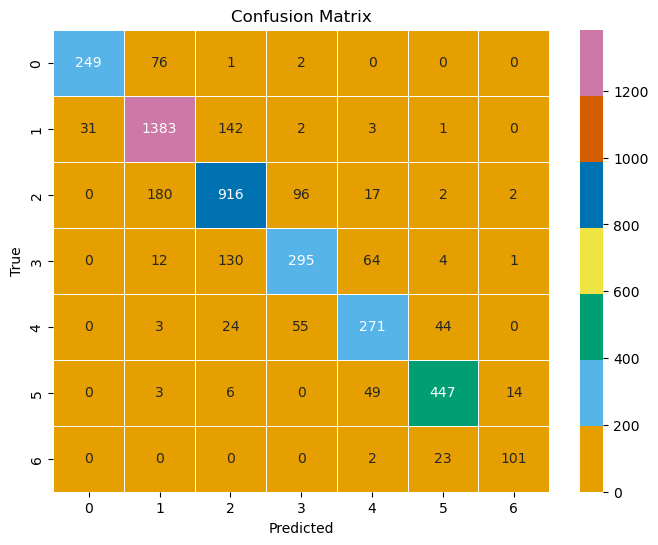

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# Fit the GradientBoostingClassifier with the sampled training data
gb_classifier = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=42)
gb_classifier.fit(X_train_sampled, y_train_sampled)

# Assuming y_true and y_pred are your true and predicted labels
y_pred = gb_classifier.predict(X_test)  # Make predictions on the test set

# Assuming y_true and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap=okabe_ito_palette, cbar=True,  linewidths=0.5)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

<h3>c. MSE and MAE</h3>

In [36]:
from joblib import load
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the Random Forest regressor model
gb_regressor = load('india_air_quality_prediction_model_gb_without_smote.h5')

# Assuming X_test_reg is your test data for regression
# Assuming y_test_reg are the true labels for the regression task

# Assuming y_pred_reg are the predicted values for a regression task
y_pred_reg = gb_regressor.predict(X_test)

# Compute MSE and MAE
mse = mean_squared_error(y_test, y_pred_reg)
mae = mean_absolute_error(y_test, y_pred_reg)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Mean Squared Error (MSE): 0.1761
Mean Absolute Error (MAE): 0.1370


<b>Observation:</b>
<ol>
    <li><b>MSE (Mean Squared Error)</b></li>
    <ul>
        <li>MSE measures the average squared difference between predicted and actual values. </li>
        <li>In this case, an MSE of 0.2847 suggests that, on average, the squared differences between the model's predictions and the true values are relatively small.</li>
        <li>The closer MSE is to zero, the better the model performance.</li>
        </ul>
    <li><b>MAE (Mean Absolute Error)</b></li>
    <ul>
        <li>MAE measures the average absolute difference between predicted and actual values. </li>
        <li>An MAE of 0.2357 indicates that, on average, the absolute differences between the model's predictions and the true values are relatively small.</li>
    </ul>
        </ol>
<b>Resolution:</b>
<ol><li>
    Considering the MSE and MAE values are relatively low, it it a positive sign for the model. </li></ol>

<h2>5.2. MODEL BUILDING with SMOTE</h2>

In [37]:
pip install -U imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   --------------------------------------- 235.6/235.6 kB 15.0 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Assuming you have already defined X and y
# Define features (X) and target variable (y)
X = data.drop(columns=['AQI_Bucket', 'City', 'Date', 'AQI'])  # Features
y = data['AQI_Bucket']  # Target variable for multiclass classification

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Percentage of data to sample from each group
sample_percentage = 80

# Group by 'AQI_Bucket' and sample a percentage of rows from each group
sampled_data = data.groupby('AQI_Bucket', group_keys=False).apply(lambda group: group.sample(frac=sample_percentage/100))

# Use SMOTE to oversample minority classes in the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sampled, y_train_sampled)

# Use the resampled data for training
# Note: You can replace X_train_sampled and y_train_sampled with X_train_resampled and y_train_resampled if you want to use SMOTE
X_train = X_train_resampled
y_train = y_train_resampled

# Use the remaining data as test data
X_test = data.drop(sampled_data.index).drop(columns=['AQI_Bucket', 'City', 'Date', 'AQI'])  # Features for test data
y_test = data.loc[data.index.difference(sampled_data.index), 'AQI_Bucket']  # Target variable for test data

print("Number of rows in Data:", data.shape[0])

# Display the resampled training data
print("\nResampled Training Data:")
print("Number of Rows Extracted:", len(X_train_resampled))

# Display the test data
print("\nTest Data:")
print("Number of Rows Extracted:", X_test.shape[0])

Number of rows in Data: 23252

Resampled Training Data:
Number of Rows Extracted: 42511

Test Data:
Number of Rows Extracted: 4650


<h3>a. ACCURACY REPORT</h3>

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from joblib import dump, load

# Fit the GradientBoostingClassifier with the sampled training data
gb_classifier = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=42)
gb_classifier.fit(X_train_sampled, y_train_sampled)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb, target_names=[str(cls) for cls in gb_classifier.classes_])

# Cross-Validation Scores
cross_val_scores_gb = cross_val_score(gb_classifier, X_train_sampled, y_train_sampled, cv=5, scoring='accuracy')
# You can adjust the number of folds (cv) as needed and use other scoring metrics if required

# Mean Cross-Validation Score
mean_cross_val_accuracy_gb = cross_val_scores_gb.mean()

# Save the trained Gradient Boosting model to an HDF5 file
model_filename_gb = 'india_air_quality_prediction_model_gb_with_smote.h5'
dump(gb_classifier, model_filename_gb)

# Print results
print("\nGradient Boosting Classifier Results:")
print(f"Accuracy: {accuracy_gb}")
print(f"Mean Cross-Validation Accuracy: {mean_cross_val_accuracy_gb}")
print(f"Cross-Validation Scores: {cross_val_scores_gb}")
print("\nClassification Report:")
print(classification_rep_gb)


Gradient Boosting Classifier Results:
Accuracy: 0.8731182795698925
Mean Cross-Validation Accuracy: 0.7730892233270626
Cross-Validation Scores: [0.76995431 0.7704918  0.775      0.77956989 0.77043011]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       316
           1       0.89      0.92      0.90      1518
           2       0.83      0.83      0.83      1208
           3       0.80      0.76      0.78       528
           4       0.86      0.84      0.85       435
           5       0.96      0.95      0.95       495
           6       0.95      0.96      0.96       150

    accuracy                           0.87      4650
   macro avg       0.89      0.88      0.88      4650
weighted avg       0.87      0.87      0.87      4650



<b>Concept:</b> 
<b>Observation:</b> 
<ol>
    <li>SMOTE increased the accuracy percentage by 9%.</li>
</ol>

<h3>b. CONFUSION MATRIX</h3>

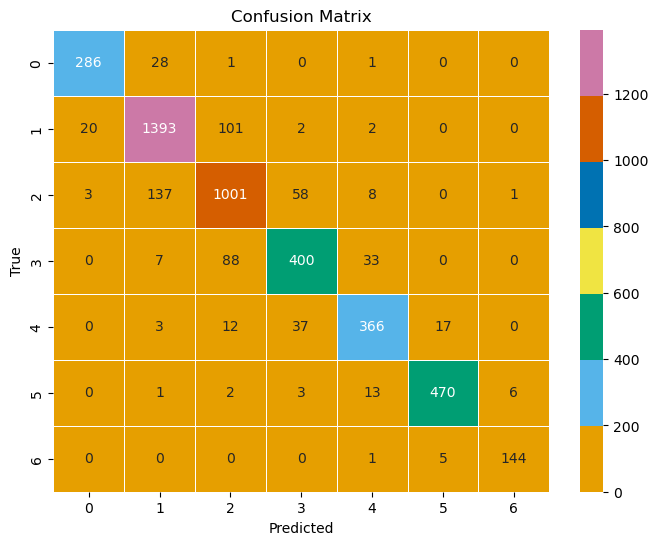

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# Fit the GradientBoostingClassifier with the sampled training data
gb_classifier = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=42)
gb_classifier.fit(X_train_sampled, y_train_sampled)

# Assuming y_true and y_pred are your true and predicted labels
y_pred = gb_classifier.predict(X_test)  # Make predictions on the test set

# Assuming y_true and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap=okabe_ito_palette, cbar=True,  linewidths=0.5)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

<h3>c. MSE and MAE</h3>

In [43]:
from joblib import load
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the Random Forest regressor model
gd_regressor = load('india_air_quality_prediction_model_gb_without_smote.h5')

# Assuming X_test_reg is your test data for regression
# Assuming y_test_reg are the true labels for the regression task

# Assuming y_pred_reg are the predicted values for a regression task
y_pred_reg = gd_regressor.predict(X_test)

# Compute MSE and MAE
mse = mean_squared_error(y_test, y_pred_reg)
mae = mean_absolute_error(y_test, y_pred_reg)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Mean Squared Error (MSE): 0.1725
Mean Absolute Error (MAE): 0.1398
